# Imports

In [5]:
library('rstan')

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



# Exercise 1
## Part A

In [1]:
df = read.csv("https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/passengercarmileage.txt", sep='\t')

# plot(df$HP, df$MPG, xlab="Horsepower", ylab="Miles per Gallon")

fit = lm(MPG ~ HP, data=df)
summary(fit)

df


Call:
lm(formula = MPG ~ HP, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7198 -4.1224 -0.9077  3.1009 22.1461 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.06608    1.56949   31.90   <2e-16 ***
HP          -0.13902    0.01207  -11.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.174 on 80 degrees of freedom
Multiple R-squared:  0.6239,	Adjusted R-squared:  0.6192 
F-statistic: 132.7 on 1 and 80 DF,  p-value: < 2.2e-16


makeAndModel,VOL,HP,MPG,SP,WT
<chr>,<int>,<int>,<dbl>,<int>,<dbl>
GM/GeoMetroXF1,89,49,65.4,96,17.5
GM/GeoMetro,92,55,56.0,97,20.0
GM/GeoMetroLSI,92,55,55.9,97,20.0
SuzukiSwift,92,70,49.0,105,20.0
DaihatsuCharade,92,53,46.5,96,20.0
GM/GeoSprintTurbo,89,70,46.2,105,20.0
GM/GeoSprint,92,55,45.4,97,20.0
HondaCivicCRXHF,50,62,59.2,98,22.5
HondaCivicCRXHF,50,62,53.3,98,22.5


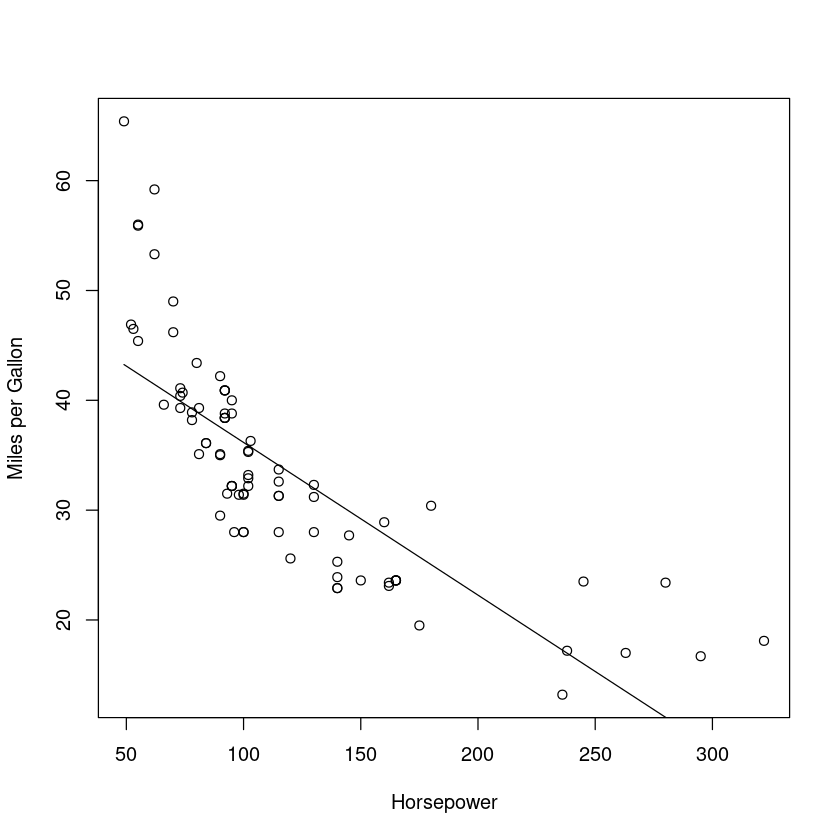

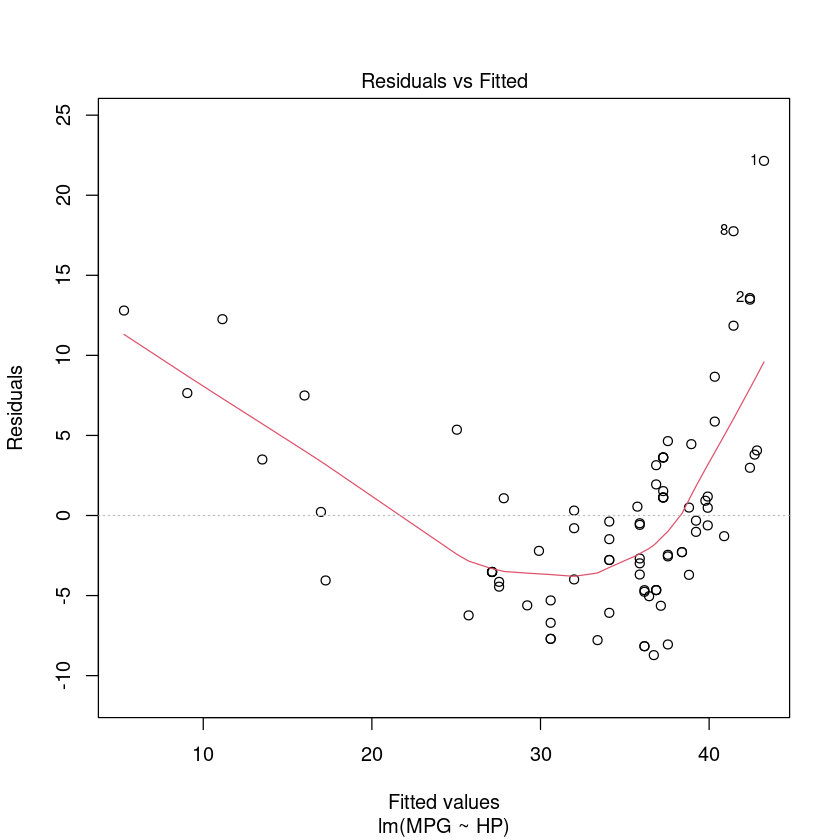

In [2]:
x_test = c(100, 200, 300)

x = cbind(1, x_test)
beta_est = coef(fit)
y_test = x %*% beta_est

plot(df$HP, df$MPG, xlab="Horsepower", ylab="Miles per Gallon")
curve(cbind(1, x) %*% coef(fit), add=TRUE)

plot(fit, which=1)

The residual plot has a clear pattern that follows the data. Ideally they should be random, looking similar to White Gaussian Noise, so they do not support the use of linear regression.

## Part B


Call:
lm(formula = log(MPG) ~ HP, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35003 -0.10508 -0.00974  0.07242  0.42440 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.0132294  0.0401238  100.02   <2e-16 ***
HP          -0.0045889  0.0003085  -14.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1578 on 80 degrees of freedom
Multiple R-squared:  0.7344,	Adjusted R-squared:  0.7311 
F-statistic: 221.2 on 1 and 80 DF,  p-value: < 2.2e-16


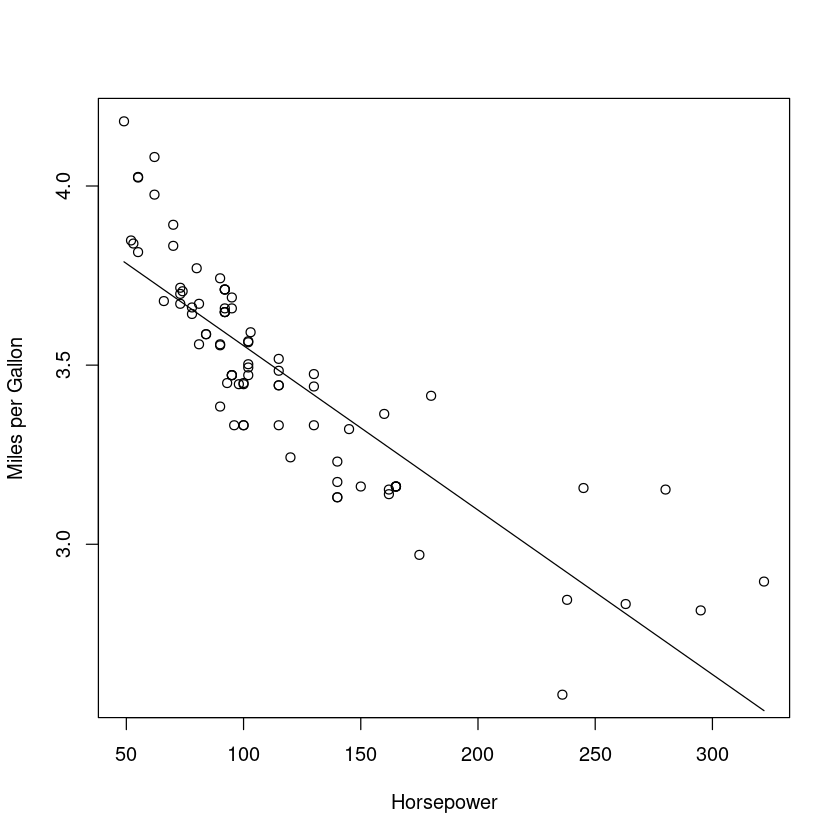

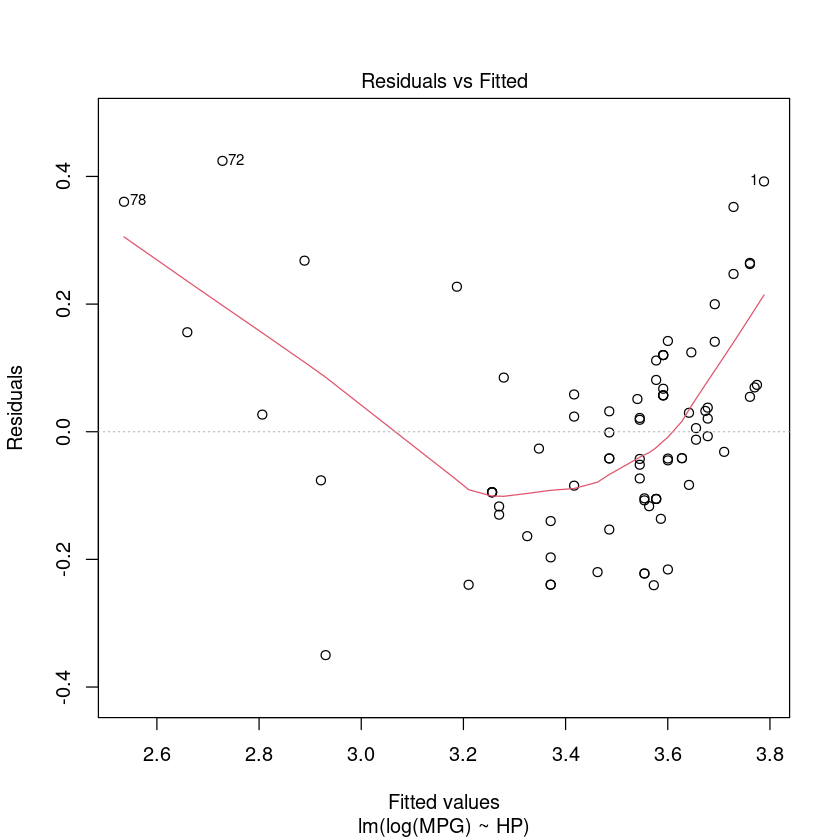

In [3]:
fit = lm(log(MPG) ~ HP, data=df)
summary(fit)

x_test = c(100, 200, 300)

x = cbind(1, x_test)
beta_est = coef(fit)
y_test = x %*% beta_est

plot(df$HP, log(df$MPG), xlab="Horsepower", ylab="Miles per Gallon")
curve(cbind(1, x) %*% coef(fit), add=TRUE)

plot(fit, which=1)

## Part C

In [4]:
fit = lm(MPG ~ HP + VOL + SP + WT, data=df)
summary(fit)


Call:
lm(formula = MPG ~ HP + VOL + SP + WT, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0108 -2.7731  0.2733  1.8362 11.9854 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 192.43775   23.53161   8.178 4.62e-12 ***
HP            0.39221    0.08141   4.818 7.13e-06 ***
VOL          -0.01565    0.02283  -0.685    0.495    
SP           -1.29482    0.24477  -5.290 1.11e-06 ***
WT           -1.85980    0.21336  -8.717 4.22e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.653 on 77 degrees of freedom
Multiple R-squared:  0.8733,	Adjusted R-squared:  0.8667 
F-statistic: 132.7 on 4 and 77 DF,  p-value: < 2.2e-16
